# Projekt 1

In [1]:
from torchmetrics.image import LearnedPerceptualImagePatchSimilarity as LPIPS, PeakSignalNoiseRatio as PSNR, StructuralSimilarityIndexMeasure as SSIM

In [2]:
import cv2
import tqdm
import torch
import lightning as L
import numpy as np
from PIL import Image
from torchvision.transforms import InterpolationMode
from dataset import ImagePairDataset
from torchvision import transforms
from lightning.pytorch.loggers import WandbLogger
from lightning.pytorch.callbacks import LearningRateMonitor

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
lpips = LPIPS()
psnr = PSNR()
ssim = SSIM()

## Zwiększanie rozdzielczości obrazów 

### 32x32 -> 256x256

#### Baseline with OpenCV

In [5]:
def rgb_to_ycbcr(image):
    ycbcr = image.convert("YCbCr")
    return ycbcr

In [6]:
# Resize to 32x32 for training
transform = transforms.Compose([
    transforms.Resize(32, interpolation=InterpolationMode.BICUBIC),
    transforms.CenterCrop(32),  # crop the LR image to 32x32
    # transforms.Lambda(rgb_to_ycbcr),
    # transforms.ToTensor()
])
# Comparing result is done on 256x256 images
original_transform = transforms.Compose([
    transforms.Resize(256, interpolation=InterpolationMode.BICUBIC),
    transforms.CenterCrop(256), 
    # transforms.Lambda(rgb_to_ycbcr),
    # transforms.ToTensor()
])
valid_dataset = ImagePairDataset(image_dir='div2k/DIV2K_valid_HR', input_transform=transform, target_transform=original_transform)

In [7]:
tensorize = transforms.ToTensor()

In [8]:
scores = {
    'lpips': [],
    'psnr': [],
    'ssim': [],
    'mse': []
}
for downsized, original in tqdm.tqdm(valid_dataset):
    arr = np.array(downsized)
    upsized = cv2.resize(arr, (256, 256), interpolation=cv2.INTER_CUBIC)
    orig = tensorize(original).unsqueeze(0)
    ups = tensorize(Image.fromarray(upsized)).unsqueeze(0)
    scores['lpips'].append(lpips(ups, orig).item())
    scores['psnr'].append(psnr(ups, orig).item())
    scores['ssim'].append(ssim(ups, orig).item())
    scores['mse'].append(torch.nn.functional.mse_loss(ups, orig).item())

100%|██████████| 100/100 [00:10<00:00,  9.13it/s]


In [9]:
for key, value in scores.items():
    print(key, np.mean(value))

lpips 0.6638716688752174
psnr 19.764219999313354
ssim 0.4551238131523132
mse 0.011888502432266251


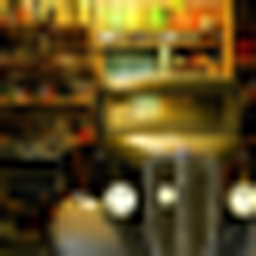

In [10]:
Image.fromarray(upsized)

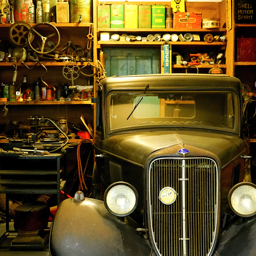

In [11]:
original

#### Model

### 64x64 -> 256x256

In [12]:
# Resize to 64x64 for training
transform = transforms.Compose([
    transforms.Resize(64, interpolation=InterpolationMode.BICUBIC),
    transforms.CenterCrop(64),  # crop the LR image to 32x32
    # transforms.Lambda(rgb_to_ycbcr),
    # transforms.ToTensor()
])
# Comparing result is done on 256x256 images
original_transform = transforms.Compose([
    transforms.Resize(256, interpolation=InterpolationMode.BICUBIC),
    transforms.CenterCrop(256), 
    # transforms.Lambda(rgb_to_ycbcr),
    # transforms.ToTensor()
])
valid_dataset = ImagePairDataset(image_dir='div2k/DIV2K_valid_HR', input_transform=transform, target_transform=original_transform)

#### Baseline with OpenCV

In [13]:
tensorize = transforms.ToTensor()

In [14]:
scores = {
    'lpips': [],
    'psnr': [],
    'ssim': [],
    'mse': []
}
for downsized, original in tqdm.tqdm(valid_dataset):
    arr = np.array(downsized)
    upsized = cv2.resize(arr, (256, 256), interpolation=cv2.INTER_CUBIC)
    orig = tensorize(original).unsqueeze(0)
    ups = tensorize(Image.fromarray(upsized)).unsqueeze(0)
    scores['lpips'].append(lpips(ups, orig).item())
    scores['psnr'].append(psnr(ups, orig).item())
    scores['ssim'].append(ssim(ups, orig).item())
    scores['mse'].append(torch.nn.functional.mse_loss(ups, orig).item())

100%|██████████| 100/100 [00:10<00:00,  9.19it/s]


In [15]:
for key, value in scores.items():
    print(key, np.mean(value))

lpips 0.4540464074909687
psnr 21.89488617897034
ssim 0.6107005744427443
mse 0.007588775912299752


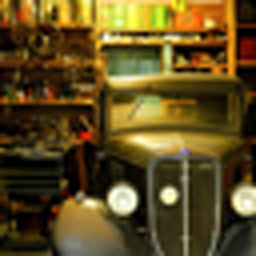

In [16]:
Image.fromarray(upsized)

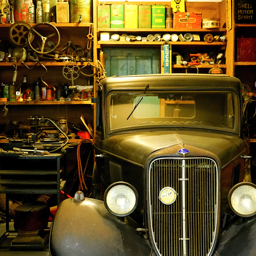

In [17]:
original